# Deep Learning

* Regression Model
* Classification Model
* Model Optimization
* USing Models

In [3]:
# Import necessay modules
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense
from keras.models import Sequential

from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
df = pd.read_csv('datasets/hourly_wages.csv')

In [5]:
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
wage_per_hour     534 non-null float64
union             534 non-null int64
education_yrs     534 non-null int64
experience_yrs    534 non-null int64
age               534 non-null int64
female            534 non-null int64
marr              534 non-null int64
south             534 non-null int64
manufacturing     534 non-null int64
construction      534 non-null int64
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [7]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Regression Model

In [8]:
# Create an array of Predictors
X = df.drop('wage_per_hour', axis=1).values

# Create an array of Target
y = df.wage_per_hour.values

### Specify a Model

In [9]:
# Save the number of columns in predictors
n_cols = X.shape[1]

# Set up the Sequential model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


### Compile the Model

After specifying the model, we need to compile it to set up the network for **optimization**. `adam` is usually a good choice for optimizer. Note that scaling data before fitting can improve optimization process.

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


### Fit the Model

In [ ]:
# Fit the model
model.fit(X, y, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10


## Classification Model

The main differences of Classification Model with the previous one are:
 - Use `categorical_crossentropy`, `sgd`, or other several loss functions, instead of `mean_squared_error`
 - Add `accuracy` to the compilation step
 - Change activation function to `softmax`
 
_Dataset: Titanic - For detailed information [>>>](https://www.kaggle.com/c/titanic)_

In [ ]:
df2 = pd.read_csv('datasets/titanic_num.csv')

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
df2.describe()

In [ ]:
# Create an array of Predictors
X = df2.drop('survived', axis=1).values

# Convert the target to categorical
y = to_categorical(df2.survived)

### Set Up the Model

In [ ]:
# Save the number of columns in predictors
n_cols = X.shape[1]

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

### Compile the Model

We'll try to predict which passengers survived

In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the Model

In [ ]:
# Fit the model
model.fit(X, y, epochs=10)

## Model Optimization

In [ ]:
input_shape=(n_cols,)

def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [ ]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(X, y, epochs=10)

### Validation Dataset

In [ ]:
# Save the number of columns in predictors
n_cols = X.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(X, y, epochs=10, validation_split=0.3)

### Early Stopping

In [ ]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors
n_cols = X.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(X, y, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])


It seems like the optimization stopped after 8 epochs

## Comparing Models

In [ ]:
# Create the new model: model_2
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape = input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit model_1
model_1_training = model_1.fit(X, y, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(X, y, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

In [ ]:
model_1_training.history['val_loss']

In [ ]:
model_2_training.history['val_loss']

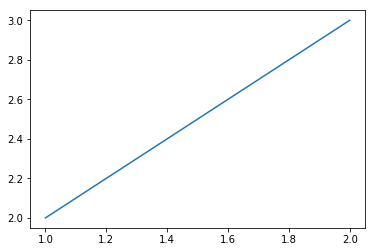

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2], [2,3])
plt.show()

In [4]:
# Create the plot
plt.plot(model_1_training.history['val_loss'])
plt.plot(model_2_training.history['val_loss'])
#plt.xlabel('Epochs')
#plt.ylabel('Validation score')
#plt.show()

NameError: name 'model_1_training' is not defined

## Using Models

1. Save
2. Reload
3. Make Predictions

In [ ]:
from keras.models import load_model

# Save the model
model.save('model_file.h5')

# Reload the model
my_model = load_model('my_model.h5')

# Calculate predictions
predictions = my_model.predict(data_to_predict_with)

# Calculate predicted probabilities (Calculate predicted probability of survival)
probability_true = predictions[:,1]

# Print predicted probabilities
probability_true